In [1]:
# Import functions from your Python file
from data_fetch import get_data

In [2]:
data = get_data('green_tripdata_summary_all')

Data fetched into DataFrame with 97874 rows.


In [3]:
data.head()

,vendor_label,trip_month,trip_quarter,trip_day,trip_weekday,day_type,trip_hour,payment_type_label,trip_type,trip_count,...,avg_tip,avg_total,avg_passenger_count,unique_pickup_locations,first_trip,last_trip,peak_morning_hours,peak_evening_hours,trip_duration_minutes,tip_rate
0,Creative Mobile Technologies,1,1,3,0,Weekend,0,Cash,Long,1,...,0.00,24.80,1.00,1,2021-01-03 00:30:22,2021-01-03 00:30:22,0,0,19.82,0.00
1,Creative Mobile Technologies,1,1,3,0,Weekend,0,Credit Card,Short,1,...,1.00,9.30,1.00,1,2021-01-03 00:57:41,2021-01-03 00:57:41,0,0,7.63,0.14
2,Creative Mobile Technologies,1,1,5,0,Weekend,0,Cash,Medium,28,...,0.00,14.42,1.18,18,2020-01-05 00:00:40,2020-01-05 00:55:48,0,0,27.13,0.00
3,Creative Mobile Technologies,1,1,5,0,Weekend,0,Credit Card,Medium,27,...,2.27,16.76,1.26,17,2020-01-05 00:01:19,2020-01-05 00:56:48,0,0,34.08,0.19
4,Creative Mobile Technologies,1,1,5,0,Weekend,0,No Charge,Short,2,...,0.00,8.05,1.00,2,2020-01-05 00:45:01,2020-01-05 00:51:19,0,0,9.77,0.00


## Data Exploration and Preprocessing

In [4]:
# Display the information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97874 entries, 0 to 97873
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vendor_label             97874 non-null  object 
 1   trip_month               97874 non-null  int64  
 2   trip_quarter             97874 non-null  int64  
 3   trip_day                 97874 non-null  int64  
 4   trip_weekday             97874 non-null  int64  
 5   day_type                 97874 non-null  object 
 6   trip_hour                97874 non-null  int64  
 7   payment_type_label       97874 non-null  object 
 8   trip_type                97874 non-null  object 
 9   trip_count               97874 non-null  int64  
 10  avg_distance             97874 non-null  float64
 11  total_distance           97874 non-null  float64
 12  avg_fare                 97874 non-null  float64
 13  total_fare               97874 non-null  float64
 14  total_tip             

| Column Name             | Data Type | Description                                                                 |
|-------------------------|-----------|-----------------------------------------------------------------------------|
| vendor_label            | Text      | Labeled vendor name based on `VendorID` (e.g., 'Creative Mobile Technologies', 'VeriFone Inc.', or 'Other') |
| trip_month              | Integer   | Month extracted from `lpep_pickup_datetime`                                |
| trip_quarter            | Integer   | Quarter of the year extracted from `lpep_pickup_datetime`                  |
| trip_day                | Integer   | Day of the month extracted from `lpep_pickup_datetime`                     |
| trip_weekday            | Integer   | Day of the week (0=Sunday, 6=Saturday) from `lpep_pickup_datetime`         |
| day_type                | Text      | 'Weekday' or 'Weekend' based on the day of the week                        |
| trip_hour               | Integer   | Hour of the day extracted from `lpep_pickup_datetime`                      |
| payment_type_label      | Text      | Labeled payment type (e.g., 'Credit Card', 'Cash', etc.) based on `payment_type` |
| trip_type               | Text      | Trip category based on average distance: 'Short' (≤2 mi), 'Medium' (≤5 mi), 'Long' (>5 mi) |
| trip_count              | Integer   | Number of trips in the group                                               |
| avg_distance            | Numeric   | Average trip distance, rounded to 2 decimals                               |
| total_distance          | Numeric   | Total distance of trips in the group                                       |
| avg_fare                | Numeric   | Average fare amount, rounded to 2 decimals                                 |
| total_fare              | Numeric   | Total fare amount of trips in the group                                    |
| total_tip               | Numeric   | Total tip amount of trips in the group                                     |
| avg_tip                 | Numeric   | Average tip amount, rounded to 2 decimals                                  |
| avg_total               | Numeric   | Average total amount (fare + extras), rounded to 2 decimals                |
| avg_passenger_count     | Numeric   | Average number of passengers, rounded to 2 decimals                        |
| unique_pickup_locations | Integer   | Number of distinct pickup location IDs                                     |
| first_trip              | Timestamp | Earliest pickup datetime in the group                                      |
| last_trip               | Timestamp | Latest pickup datetime in the group                                        |
| peak_morning_hours      | Integer   | Number of trips during peak morning hours (6–9 AM)                         |
| peak_evening_hours      | Integer   | Number of trips during peak evening hours (5–7 PM)                         |
| trip_duration_minutes   | Numeric   | Maximum trip duration (in minutes), rounded to 2 decimals                  |
| tip_rate                | Numeric   | Average tip as a percentage of fare, rounded to 2 decimals                 |


In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97874 entries, 0 to 97873
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vendor_label             97874 non-null  object 
 1   trip_month               97874 non-null  int64  
 2   trip_quarter             97874 non-null  int64  
 3   trip_day                 97874 non-null  int64  
 4   trip_weekday             97874 non-null  int64  
 5   day_type                 97874 non-null  object 
 6   trip_hour                97874 non-null  int64  
 7   payment_type_label       97874 non-null  object 
 8   trip_type                97874 non-null  object 
 9   trip_count               97874 non-null  int64  
 10  avg_distance             97874 non-null  float64
 11  total_distance           97874 non-null  float64
 12  avg_fare                 97874 non-null  float64
 13  total_fare               97874 non-null  float64
 14  total_tip             

In [6]:
import pandas as pd

# 1. Convert suitable object columns to category
object_cols = ['vendor_label', 'day_type', 'payment_type_label', 'trip_type']
for col in object_cols:
    data[col] = data[col].astype('category')

# 2. Downcast integer columns
int_cols = data.select_dtypes(include=['int64']).columns
data[int_cols] = data[int_cols].apply(pd.to_numeric, downcast='integer')

# 3. Downcast float columns
float_cols = data.select_dtypes(include=['float64']).columns
data[float_cols] = data[float_cols].apply(pd.to_numeric, downcast='float')

# 4. Drop unwanted columns (optional)
data.drop(columns=['first_trip', 'last_trip'], inplace=True)

# 5. Check memory usage after optimization
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97874 entries, 0 to 97873
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vendor_label             97874 non-null  category
 1   trip_month               97874 non-null  int8    
 2   trip_quarter             97874 non-null  int8    
 3   trip_day                 97874 non-null  int8    
 4   trip_weekday             97874 non-null  int8    
 5   day_type                 97874 non-null  category
 6   trip_hour                97874 non-null  int8    
 7   payment_type_label       97874 non-null  category
 8   trip_type                97874 non-null  category
 9   trip_count               97874 non-null  int16   
 10  avg_distance             97874 non-null  float32 
 11  total_distance           97874 non-null  float64 
 12  avg_fare                 97874 non-null  float32 
 13  total_fare               97874 non-null  float64 
 14  total_

## Data Analysis

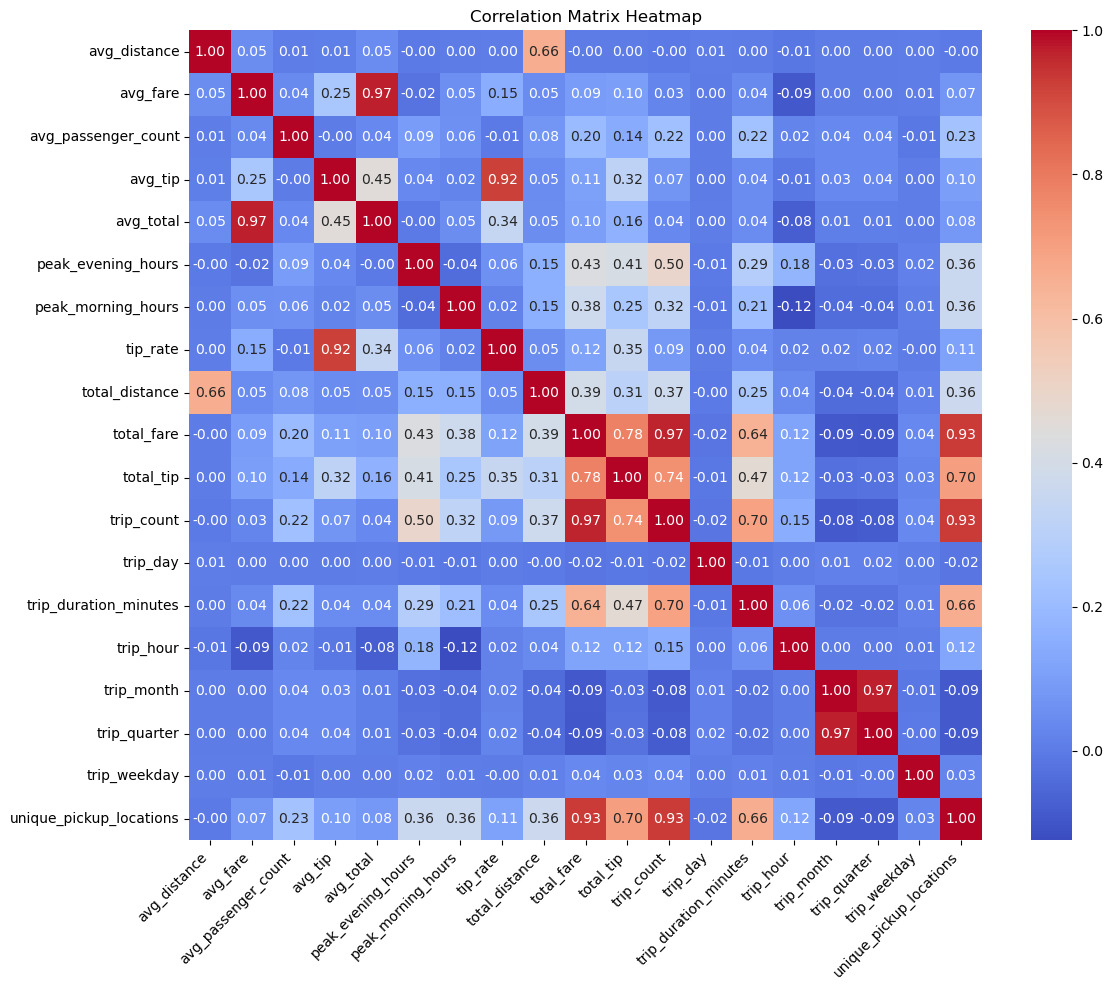

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine float and integer columns for correlation
numeric_cols = float_cols.union(int_cols)

# Compute correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with values annotated inside each square
sns.heatmap(
    correlation_matrix,
    annot=True,             # Display the correlation values in the squares
    cmap='coolwarm',       # Set the color map
    fmt='.2f',             # Format the numbers with two decimal places
    cbar=True,             # Show the color bar
    xticklabels=correlation_matrix.columns,  # Set x-axis labels
    yticklabels=correlation_matrix.columns,  # Set y-axis labels
    annot_kws={'size': 10}  # Optional: Adjust size of the text
)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

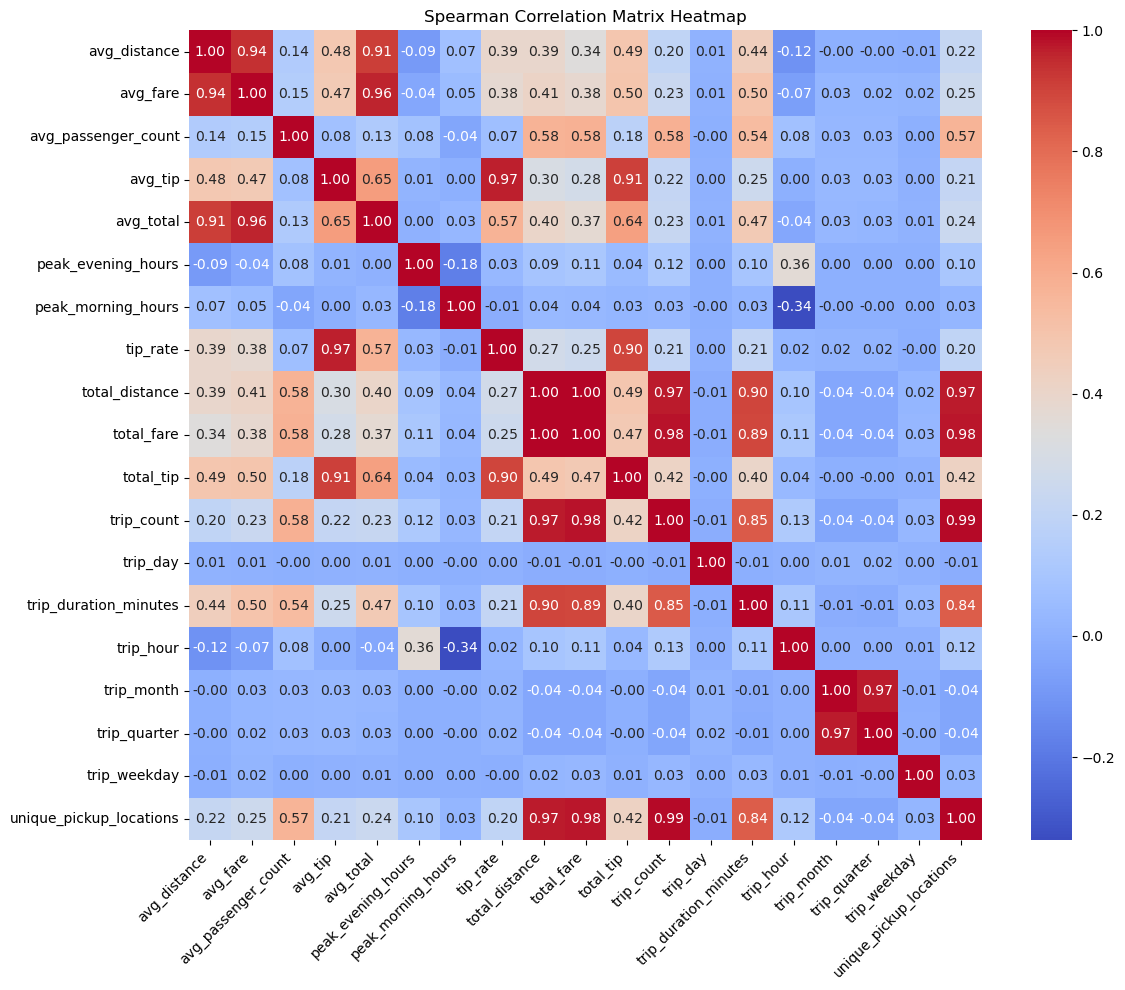

In [8]:
# Compute Spearman's correlation matrix
correlation_matrix_spearman = data[numeric_cols].corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap for Spearman correlation with values annotated inside each square
sns.heatmap(
    correlation_matrix_spearman,
    annot=True,             # Display the correlation values in the squares
    cmap='coolwarm',       # Set the color map
    fmt='.2f',             # Format the numbers with two decimal places
    cbar=True,             # Show the color bar
    xticklabels=correlation_matrix_spearman.columns,  # Set x-axis labels
    yticklabels=correlation_matrix_spearman.columns,  # Set y-axis labels
    annot_kws={'size': 10}  # Optional: Adjust size of the text
)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title
plt.title('Spearman Correlation Matrix Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

del correlation_matrix_spearman, correlation_matrix, numeric_cols, int_cols, float_cols, object_cols, col

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of features to include (those that can be determined before knowing the total fare)
features_to_include = [
    'vendor_label', 
    'trip_month', 
    'trip_quarter', 
    'trip_day', 
    'trip_weekday', 
    'day_type', 
    'trip_hour', 
    'payment_type_label', 
    'trip_type', 
    'trip_count', 
    'avg_distance', 
    'total_distance', 
    'avg_passenger_count', 
    'unique_pickup_locations', 
    'peak_morning_hours', 
    'peak_evening_hours', 
    'trip_duration_minutes',
    'total_fare',
]

# Create a subset of the data with only the selected columns to save memory
data = data[features_to_include]

# Optionally, use LabelEncoder only if you need numerical encoding for machine learning models
# For large datasets, LabelEncoder is often more memory efficient than OneHotEncoder
label_encoder = LabelEncoder()

# Encoding categorical features
data['vendor_label'] = label_encoder.fit_transform(data['vendor_label'])
data['payment_type_label'] = label_encoder.fit_transform(data['payment_type_label'])
data['trip_type'] = label_encoder.fit_transform(data['trip_type'])
data['day_type'] = label_encoder.fit_transform(data['day_type'])

# data_selected now contains memory-optimized features, ready for model training
del label_encoder, features_to_include

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import numpy as np
import joblib

# Step 1: Define features and target variable
target = 'total_fare'

X = data.drop(columns=[target])
y = data[target]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Initialize Random Forest model with initial hyperparameters
model = RandomForestRegressor(
    n_estimators=100,          # Starting with 100 trees
    max_depth=5,               # Limiting max depth to 5 to avoid overfitting
    random_state=42
)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model

# Test set
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Train set
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Results
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")


Train RMSE: 146.44
Test RMSE: 153.38
Model saved as 'random_forest_model.pkl'


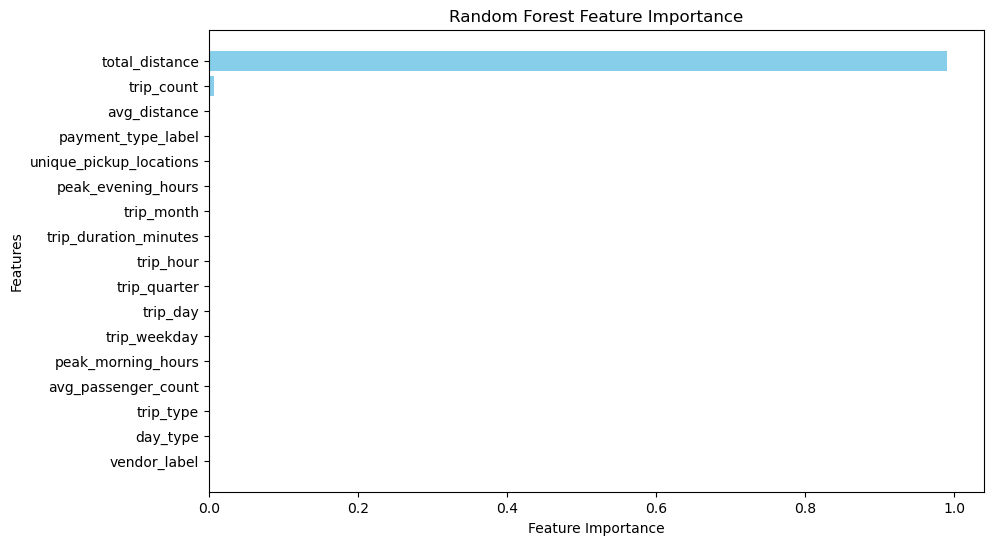

In [46]:
# Step 6: Plot feature importances
feature_importances = model.feature_importances_
features = X.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = features[sorted_idx]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib

# Step 3: Initialize Decision Tree model with initial hyperparameters
model = DecisionTreeRegressor(
    max_depth=4,              # Limiting max depth to prevent overfitting
    random_state=42
)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model

# Test set
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Train set
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Results
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Save the trained model
joblib.dump(model, 'decision_tree_model.pkl')
print("Model saved as 'decision_tree_model.pkl'")


Train RMSE: 234.27
Test RMSE: 234.37
Model saved as 'decision_tree_model.pkl'


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import joblib  # For saving the model

# Step 1: Define target and features
target = 'total_fare'
X = data.drop(columns=[target])
y = data[target]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Create pipeline with scaling + Bayesian Ridge
model = Pipeline([
    ('scaler', StandardScaler()),
    ('bayes_ridge', BayesianRidge())
])

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

# Step 6: Results
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")

# Step 7: Save the model to a file
joblib.dump(model, 'bayesian_ridge_pipeline.pkl')
print("✅ Model saved as 'bayesian_ridge_pipeline.pkl'")


Train RMSE: 364.86
Test RMSE: 425.66
Test MAE: 200.32
✅ Model saved as 'bayesian_ridge_pipeline.pkl'


In [34]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import numpy as np

# # Step 1: Define features and target variable
# target = 'total_fare'

# X = data.drop(columns=[target])
# y = data[target]

# # Step 2: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Step 3: Initialize XGBoost model with initial hyperparameters
# model = xgb.XGBRegressor(
#     n_estimators=100,          # Number of boosting rounds
#     max_depth=5,               # Maximum depth of trees
#     learning_rate=0.1,         # Step size shrinking to prevent overfitting
#     random_state=42
# )

# # Step 4: Train the model
# model.fit(X_train, y_train)

# # Step 5: Evaluate the model

# # Test set
# y_test_pred = model.predict(X_test)
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# # Train set
# y_train_pred = model.predict(X_train)
# train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# # Results
# print(f"Train RMSE: {train_rmse:.2f}")
# print(f"Test RMSE: {test_rmse:.2f}")